In [1]:
# importando bibliotecas uteis em python:
import numpy as np
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from random import randint
from random import random

### Script para simular um perfil sintético gravimétrico. A fonte enterrada é uma esfera (fonte pontual) localizada nas coordenadas cartesianas (xc, zc) definidas pelo usuário.

### A equação que computa a componente vertical (z) da atração gravitacional produzida por uma fonte pontual é :
# $g_z = -G\frac{m (z-zc)}{[(x-xc)^2 + (z-zc)^2]^{3/2}}$


In [2]:
# definindo as posicoes final e inicial do gravimetro em funcao das coordenadas do perfil sintetico:
min = randint(0,10) #Sorteando a posição inicial do Gravímetro.
max = randint(0,10) #Sorteando a posição final do Gravímetro.
if min > max:       #Caso o mínimo e o máximo estiverem trocados.
    min = max
    max = min
else:
    min = min
    max = max
if min == max:      #Caso o mínimo e o máximo forem iguais.
    min = randint(0,max)
    max = randint(min,10)
#print(min, max)

In [3]:
# definicao das coordenadas do perfil sintetico:
xmin = -100.0 # minimo do perfil
xmax = +100.0 # maximo do perfil
n = 50 # numero de pontos do perfil
x = np.linspace(xmin, xmax, n, endpoint= True ) # coordenadas x do perfil

# altura das medidas:
#k = np.linspace(-10,10)
z = -10

In [4]:
# definicao das coordenadas do perfil sintetico via edson brain!
coord = list(range(10))   #Estou supondo 10 Gravímetros pois me parece um bom número para conferir o funcionamento do programa.
for n in range(0,10):
    coord[n] = (x[n],0)   #A coordenada z vai ser sempre 0, pois os Gravímetros estão na superfície.
#print (coord[0][1])

In [5]:
#DEFININDO ALGUMAS CONSTANTES
G = 6.674*(10**(-11)) # constante universal no SI:
si2mGal = 100000.0 # conversor de unidades
pi_edson = 3.1415 # não presi
pi = np.pi
#print ('pi_edson =', pi_edson, 'pi_python=', pi)

In [8]:
# Definicao das propriedades da fonte esferica:
xc = 0.0 # metros
zc = 150 # metros
raio = 10.0 # metros
rho = 2000.0 # kg/m3
# volume da fonte
V = (4.0/3.0) * pi * raio**3 * rho
massa = V * rho


In [9]:
#Definindo a funcao bolinha:
rmin = 0
rmax = 10
r = np.linspace(rmin,rmax,num=10,endpoint=True)
y = 2*pi*r

In [10]:
# calculo da componente vertical gz:
gz =  - G * massa * (z-zc) / ( (x-xc)**2 + (z-zc)**2 )**(3/2)
gz *= si2mGal
print (gz)
#np.savetxt('TODO_021.txt',gz,header='Dados da componente vertical de gz lido em cada posição do Gravimetro')

[502.57952048 514.12815013 525.70483556 537.27676436 548.80813511
 560.26018787 571.59128609 582.75705632 593.71059131 604.40272134
 614.78235694 624.7969047  634.3927553  643.51584078 652.11225493
 660.12892791 667.51434313 674.21928163 680.19757647 685.40685787
 689.80926817 693.37212554 696.06851527 697.87778952 698.78595834
 698.78595834 697.87778952 696.06851527 693.37212554 689.80926817
 685.40685787 680.19757647 674.21928163 667.51434313 660.12892791
 652.11225493 643.51584078 634.3927553  624.7969047  614.78235694
 604.40272134 593.71059131 582.75705632 571.59128609 560.26018787
 548.80813511 537.27676436 525.70483556 514.12815013 502.57952048]


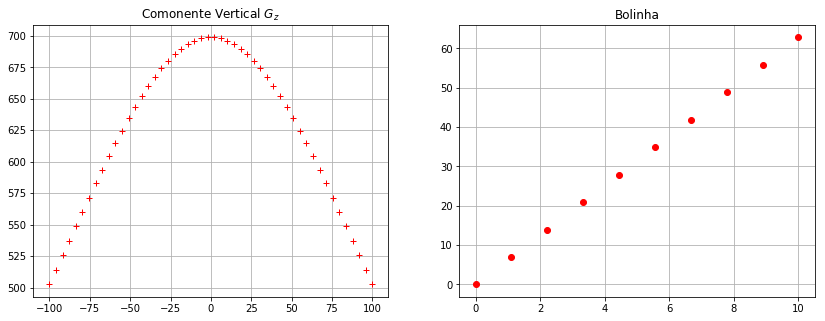

In [11]:
# plotando o resultado:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(x,gz,'r+')
plt.title('Comonente Vertical $G_z$')
plt.grid()
plt.subplot(1,2,2)
plt.plot(r,y,'ro')
plt.title('Bolinha')
plt.grid()
plt.savefig('TODO_022.pdf',dpi=300, transparent=True, bbox_inches='tight')
plt.show()

## TODO:
##  1) Subplot com a bolinha, colocando o tamanho da bolinha em funcao do raio
##  2) Salvar a figura e o arquivo com os dados

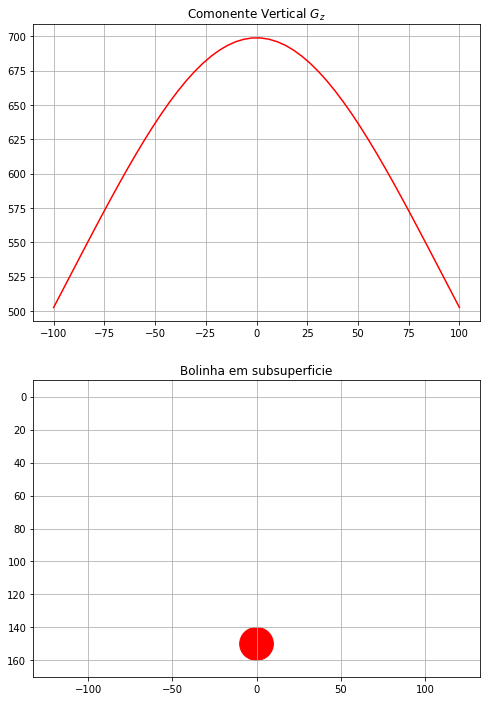

In [31]:
plt.figure(figsize=(8,12))
circle1=plt.Circle((xc,zc),radius=raio,color =  'r')
plt.subplot(2,1,1)
plt.plot(x,gz,'r')
plt.title('Comonente Vertical $G_z$')
plt.grid()

plt.subplot(2,1,2)
#plt.contourf(X, Y, U1, 25, cmap = plt.cm.jet)
plt.gcf().gca().add_artist(circle1)
plt.title('Bolinha em subsuperficie')
plt.grid()
plt.xlim( ((z)/2 - 1.5*(zc+2*raio)/2, ((-z)/2) + 1.5*(zc+2*raio)/2 ) )
plt.ylim( (z , zc + 2*raio) )
plt.gca().invert_yaxis()
plt.savefig('TODO_023.pdf', dpi=300, transparet=True, bbox_inches='tight')
#plt.colorbar()
plt.show()

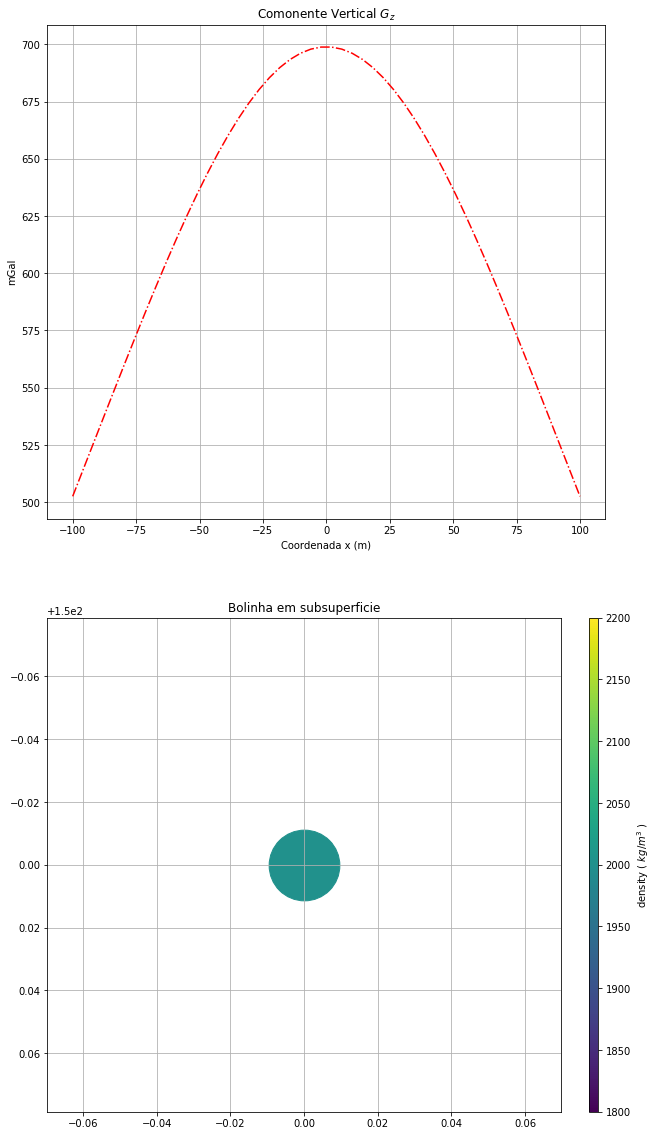

In [29]:
#### Utilizando a funcao scatter (alternativamente):
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(x,gz,'r-.')
plt.title('Comonente Vertical $G_z$')
plt.xlabel('Coordenada x (m)')
plt.ylabel('mGal')
plt.grid()

############# PLOT DA FONTE PONTUAL #################################
plt.subplot(2,1,2)
plt.title('Bolinha em subsuperficie')
p = plt.scatter(xc, zc, s = 20000, c=rho,marker='.')
cbar = plt.colorbar(p, aspect=50, fraction = 0.03, orientation="vertical")
cbar.set_label('density ( $ kg/m^{3}$ )',fontsize=10, rotation = 90)
plt.grid()
#plt.xlim( (-2.0*raio,2*raio) )
#plt.ylim( (z,2.0*zc ) )
plt.gca().invert_yaxis()
plt.savefig('TODO_023.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

# TODO: Verificar os plots usando a funcao scatter e a funcao edson!